## Name: Thushal Babukumar ||  ID  : 46154469 || Portfolio-3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline


## Predicting the Genre of Books from Summaries

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) and includes meta-data about the genre of the books taken from Freebase.  Each book can have more than one genre and there are 227 genres listed in total.  To simplify the problem of genre prediction we will select a small number of target genres that occur frequently in the collection and select the books with these genre labels.  This will give us one genre label per book. 

Your goal in this portfolio is to take this data and build predictive models to classify the books into one of the five target genres.  You will need to extract suitable features from the texts and select suitable models to classify them. You should build and evaluate at least TWO models and compare the prediction results.

You should report on each stage of your experiment as you work with the data.


## Data Preparation

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](data/booksummaries/README.txt) file.

In [3]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/booksummaries/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


We next filter the data so that only our target genre labels are included and we assign each text to just one of the genre labels.  It's possible that one text could be labelled with two of these labels (eg. Science Fiction and Fantasy) but we will just assign one of those here. 

In [4]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [5]:
# check how many books we have in each genre category
genre_books.groupby('genre').count()


,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


In [6]:
genre_books.head()

,title,author,date,summary,genre
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy


## Feature Exaction

Now you take over to build a suitable model and present your results.

Firstly, you need to perform feature extraction to produce feature vectors for the predictive models.

We are not adding stop words to our feature list

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
vectorizer  = TfidfVectorizer(max_features = 5000, stop_words= stopwords.words('english'), min_df=5)
X = vectorizer.fit_transform(genre_books.summary).toarray()
print('No. of features selected: ', len(vectorizer.get_feature_names()))


No. of features selected:  5000


## Label Encoding

We are encoding each genre with a numerical value

In [23]:
#Encoding each genre with a numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(genre_books.genre)
genre_books['label'] = le.transform(genre_books.genre)
print("Encoded values for each genre: ",set(genre_books.label) )

Encoded values for each genre:  {0, 1, 2, 3, 4}


In [24]:
#Decoding the encoded values
target_names = list(le.inverse_transform([0,1,2,3,4]))
target_names

["Children's literature", 'Fantasy', 'Mystery', 'Novel', 'Science Fiction']

In [25]:
genre_books.head()

,title,author,date,summary,genre,label
0,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature,0
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel,3
2,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel,3
4,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy,1
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy,1


## Model Training

Then, train two predictive models from the given data set.

In [26]:
#splitting our data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, genre_books['label'], test_size = 0.2, random_state = 143)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7163, 5000)
(1791, 5000)
(7163,)
(1791,)


# Building various ML models and printing their performance scores

## *Logistic Regression*

In [15]:

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_test_pred = lr.predict(X_test)


In [111]:
average_acc_LR = accuracy_score(y_test, y_test_pred)
average_prec_LR = precision_score(y_test, y_test_pred, average='weighted')
average_recall_LR = recall_score(y_test, y_test_pred, average='weighted')
average_f1_LR = f1_score(y_test, y_test_pred, average='weighted')
print(classification_report(y_test, y_test_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.67      0.47      0.55       242
              Fantasy       0.76      0.75      0.75       485
              Mystery       0.77      0.68      0.72       274
                Novel       0.59      0.75      0.66       427
      Science Fiction       0.75      0.74      0.74       363

             accuracy                           0.70      1791
            macro avg       0.71      0.68      0.69      1791
         weighted avg       0.71      0.70      0.70      1791



## *K nearest neighbor* 

In [43]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn_y_test_pred = neigh.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_y_test_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.36      0.16      0.22       242
              Fantasy       0.29      0.94      0.45       485
              Mystery       0.77      0.13      0.22       274
                Novel       0.61      0.06      0.11       427
      Science Fiction       0.81      0.10      0.19       363

             accuracy                           0.33      1791
            macro avg       0.57      0.28      0.24      1791
         weighted avg       0.55      0.33      0.25      1791



In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_knn = accuracy_score(y_test, knn_y_test_pred)
average_prec_knn = precision_score(y_test, knn_y_test_pred, average='weighted')
average_f1_knn = f1_score(y_test, knn_y_test_pred, average='weighted')
average_recall_knn = recall_score(y_test, knn_y_test_pred, average='weighted')

## *SVC Model*

In [27]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [28]:
y_SVM_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_SVM_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.67      0.25      0.36       242
              Fantasy       0.76      0.74      0.75       485
              Mystery       0.83      0.54      0.65       274
                Novel       0.50      0.81      0.62       427
      Science Fiction       0.73      0.71      0.72       363

             accuracy                           0.65      1791
            macro avg       0.70      0.61      0.62      1791
         weighted avg       0.69      0.65      0.65      1791



In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_svm = accuracy_score(y_test, y_SVM_pred)
average_prec_svm = precision_score(y_test, y_SVM_pred, average='weighted')
average_recall_svm = recall_score(y_test, y_SVM_pred, average='weighted')
average_f1_svm = f1_score(y_test, y_SVM_pred, average='weighted')



## *Random Forest*

In [56]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5,random_state=0, n_estimators=20, n_jobs=100, )
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=100, random_state=0)

In [61]:
y_rf_pred = clf.predict(X_test)

In [62]:
print(classification_report(y_test,y_rf_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.00      0.00      0.00       242
              Fantasy       0.60      0.62      0.61       485
              Mystery       0.86      0.12      0.21       274
                Novel       0.35      0.82      0.49       427
      Science Fiction       0.70      0.46      0.56       363

             accuracy                           0.48      1791
            macro avg       0.50      0.41      0.37      1791
         weighted avg       0.52      0.48      0.43      1791



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_rf = accuracy_score(y_test, y_rf_pred)
average_prec_rf = precision_score(y_test, y_rf_pred, average='weighted')
average_recall_rf = recall_score(y_test, y_rf_pred, average='weighted')
average_f1_rf = f1_score(y_test, y_rf_pred, average='weighted')


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  *Decision Tree*

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train, sample_weight=None, check_input=True, X_idx_sorted=None)

DecisionTreeClassifier(random_state=0)

In [69]:
y_dt_test = clf.predict(X_test)

In [70]:
print(classification_report(y_test,y_dt_test, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.31      0.29      0.30       242
              Fantasy       0.54      0.51      0.53       485
              Mystery       0.48      0.53      0.51       274
                Novel       0.43      0.47      0.45       427
      Science Fiction       0.52      0.49      0.50       363

             accuracy                           0.47      1791
            macro avg       0.46      0.46      0.46      1791
         weighted avg       0.47      0.47      0.47      1791



In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_dt = accuracy_score(y_test, y_dt_test)
average_prec_dt = precision_score(y_test, y_dt_test, average='weighted')
average_recall_dt = recall_score(y_test, y_dt_test, average='weighted')
average_f1_dt = f1_score(y_test, y_dt_test, average='weighted')


# *Neural Network*

In [78]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [82]:
y_nn_pred = clf.predict(X_test)

In [85]:
print(classification_report(y_test,y_nn_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.60      0.52      0.56       242
              Fantasy       0.71      0.71      0.71       485
              Mystery       0.66      0.65      0.65       274
                Novel       0.60      0.62      0.61       427
      Science Fiction       0.63      0.66      0.65       363

             accuracy                           0.65      1791
            macro avg       0.64      0.63      0.64      1791
         weighted avg       0.65      0.65      0.64      1791



In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_nn = accuracy_score(y_test, y_nn_pred)
average_prec_nn = precision_score(y_test, y_nn_pred, average='weighted')
average_recall_nn = recall_score(y_test, y_nn_pred, average='weighted')
average_f1_nn = f1_score(y_test, y_nn_pred, average='weighted')


## *Adaboost classifier*

In [88]:
 from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [89]:
y_ada_pred = clf.predict(X_test)

In [91]:
print(classification_report(y_test,y_ada_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.51      0.45      0.48       242
              Fantasy       0.70      0.63      0.66       485
              Mystery       0.65      0.59      0.62       274
                Novel       0.49      0.60      0.54       427
      Science Fiction       0.66      0.67      0.66       363

             accuracy                           0.60      1791
            macro avg       0.60      0.59      0.59      1791
         weighted avg       0.61      0.60      0.60      1791



In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_ada = accuracy_score(y_test, y_ada_pred)
average_prec_ada = precision_score(y_test, y_ada_pred, average='weighted')
average_recall_ada = recall_score(y_test, y_ada_pred, average='weighted')
average_f1_ada = f1_score(y_test, y_ada_pred, average='weighted')


## *Naive Bayes Algorithm*

In [93]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [94]:
y_nb_pred = clf.predict(X_test)

In [95]:
print(classification_report(y_test,y_nb_pred, target_names= target_names))

                       precision    recall  f1-score   support

Children's literature       0.41      0.46      0.43       242
              Fantasy       0.77      0.61      0.68       485
              Mystery       0.50      0.54      0.52       274
                Novel       0.47      0.47      0.47       427
      Science Fiction       0.56      0.64      0.60       363

             accuracy                           0.55      1791
            macro avg       0.54      0.54      0.54      1791
         weighted avg       0.57      0.55      0.56      1791



In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average_acc_nb = accuracy_score(y_test, y_nb_pred)
average_prec_nb = precision_score(y_test, y_nb_pred, average='weighted')
average_recall_nb = recall_score(y_test, y_nb_pred, average='weighted')
average_f1_nb = f1_score(y_test, y_nb_pred, average='weighted')


## Building a matrix of all the prediction scores of various models

In [138]:

data = [[average_acc_LR, average_acc_knn, average_acc_svm,average_acc_rf, average_acc_dt, average_acc_nn, average_acc_ada, average_acc_nb ],[average_prec_LR, average_prec_knn, average_acc_svm,average_acc_rf,average_acc_dt, average_acc_nn, average_acc_ada, average_acc_nb ] , [average_f1_LR, average_f1_knn, average_f1_svm,average_f1_rf, average_f1_dt, average_f1_nn, average_f1_ada, average_f1_nb ]
       , [average_recall_LR, average_recall_knn, average_recall_svm,average_recall_rf, average_recall_dt, average_recall_nn, average_recall_ada, average_recall_nb]]



# Model Evaluation

Finally, we evaluate and compare the learned predictive models.

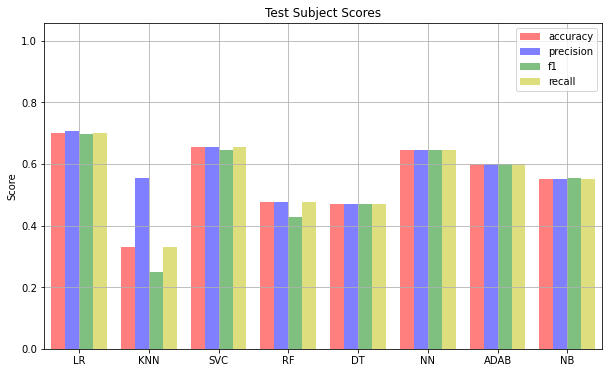

In [139]:
pos = list(range(len(data[0])))
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(pos, data[0], width, alpha=0.5, color='r')
plt.bar([p + width for p in pos], data[1], width, alpha=0.5, color='b')
plt.bar([p + width*2 for p in pos], data[2], width, alpha=0.5, color='g')
plt.bar([p + width*3 for p in pos], data[3], width, alpha=0.5, color='y')
    



# Setting the y axis label
ax.set_ylabel('Score')

# Setting the chart's title
ax.set_title('Test Subject Scores')

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(data[0]+ data[1]+data[2]+data[3])*1.5] )

# Adding the legend and showing the plot
plt.legend(['accuracy', 'precision', 'f1','recall'], loc='upper right')
plt.grid(None)
plt.show()

#https://www.dezyre.com/recipes/generate-grouped-bar-plot-in-python

# Conclusion

### - From the final comparison graph we see that Logistic Prediction has the highest prediction scores out of all the models we have built

### - The reason behind this might be because the other models have been used with the default parameters and have not been fine tuned for the best performance. For example, the 'n' value for K nearest neighbors was chosen randomly and no analysis was performed to choose the best value of 'n'